# Preparando ambiente

In [1]:
import pandas              as pd
import numpy               as np
import matplotlib.pyplot   as plt
import seaborn             as sns
#import missingno           as msno
import numpy               as np
import requests
import zipfile
import lxml.html
import os

%matplotlib inline

pd.set_option('display.max_columns',500)


# Obtendo dados

In [2]:
#df             = pd.read_excel('/ambiente/datasciece-dev/dataset-megasena/resultados.xlsx')
#Faz download do arquivo de historico da megasena, converte para dataframe e salva em arquivo .csv
def download_megasena_data():
    print('Download dos resultados da megasena...')
    url = 'http://www1.caixa.gov.br/loterias/_arquivos/loterias/D_megase.zip'
    myfile = requests.get(url)
    temp_directory = './temp'

    if not os.path.exists(temp_directory):
        os.makedirs(temp_directory)

    open(temp_directory + '/resultados_megasena.zip', 'wb').write(myfile.content)

    # Unzip do arquivo
    print('Descompactando arquivo...')
    zip_ref = zipfile.ZipFile(temp_directory + '/resultados_megasena.zip', 'r')
    zip_ref.extractall(temp_directory)
    zip_ref.close()

    # Converte o html para data frame do pandas
    print('Convertendo dados...')
    df_list = pd.read_html(temp_directory + '/d_mega.htm')
    df = df_list[0]

    # Remove duplicados - a conversão do html repete resultados com mais de 1 ganhador
    print('Processando dados...')
    df.drop_duplicates(subset ="Concurso",keep = 'first', inplace = True) 

    print('Salvando arquivo resultados_megasena.csv...')
    #for i, df in enumerate(df_list):
    df.to_csv('resultados_megasena.csv')
    #df.head()
    return (df)


# download dos dados da megasena
download_megasena_data()

Download dos resultados da megasena...
Descompactando arquivo...
Convertendo dados...
Processando dados...
Salvando arquivo resultados_megasena.csv...


,Concurso,Data Sorteio,1ª Dezena,2ª Dezena,3ª Dezena,4ª Dezena,5ª Dezena,6ª Dezena,Arrecadacao_Total,Ganhadores_Sena,Cidade,UF,Rateio_Sena,Ganhadores_Quina,Rateio_Quina,Ganhadores_Quadra,Rateio_Quadra,Acumulado,Valor_Acumulado,Estimativa_Prêmio,Acumulado_Mega_da_Virada
0,1,11/03/1996,41,5,4,52,30,33,000,0,&nbsp,&nbsp,000,17,39.15892,2016,33021.0,SIM,1.714.65023,000,000
1,2,18/03/1996,9,39,37,49,43,41,000,1,NaN,PR,2.307.16223,65,14.42402,4488,20891.0,NÃO,000,000,000
2,3,25/03/1996,36,30,10,11,29,47,000,2,NaN,RN,391.19251,62,10.51593,4261,15301.0,NÃO,000,000,000
4,4,01/04/1996,6,59,42,27,1,5,000,0,&nbsp,&nbsp,000,39,15.32224,3311,18048.0,SIM,717.08075,000,000
5,5,08/04/1996,1,19,46,6,16,2,000,0,&nbsp,&nbsp,000,98,5.31810,5399,9653.0,SIM,1.342.48885,000,000
6,6,15/04/1996,19,40,7,13,22,47,000,0,&nbsp,&nbsp,000,109,7.21466,7147,11003.0,SIM,2.286.16633,000,000
7,7,22/04/1996,56,38,21,20,3,5,000,0,&nbsp,&nbsp,000,100,8.74605,5736,15248.0,SIM,3.335.69228,000,000
8,8,29/04/1996,53,17,38,4,47,37,000,0,&nbsp,&nbsp,000,60,16.08411,5262,18340.0,SIM,4.493.74819,000,000
9,9,06/05/1996,55,43,56,54,8,60,000,0,&nbsp,&nbsp,000,17,60.04379,2175,46931.0,SIM,5.718.64149,000,000
10,10,13/05/1996,25,4,18,57,21,38,000,0,&nbsp,&nbsp,000,251,6.63845,12590,13235.0,SIM,13.334.76981,000,000


# Carrega dados do arquivo *.csv

In [3]:
# Le arquivo de dados# the histogram of the data
df = pd.read_csv("resultados_megasena.csv")

# Gera lista com todas dezenas
dezenas = pd.DataFrame(df['1ª Dezena'].tolist() + df['2ª Dezena'].tolist() + df['3ª Dezena'].tolist() + df['4ª Dezena'].tolist() + df['5ª Dezena'].tolist() + df['6ª Dezena'].tolist(), columns=['numeros'])

sequence = pd.DataFrame(df[['1ª Dezena','2ª Dezena','3ª Dezena','4ª Dezena','5ª Dezena','6ª Dezena',]]).to_numpy()

print(sequence)

[[41  5  4 52 30 33]
 [ 9 39 37 49 43 41]
 [36 30 10 11 29 47]
 ...
 [59 47 46 19 39 22]
 [51 13 43 30 34 26]
 [51 15 52 36 59 45]]


# Analise dezenas sorteadas

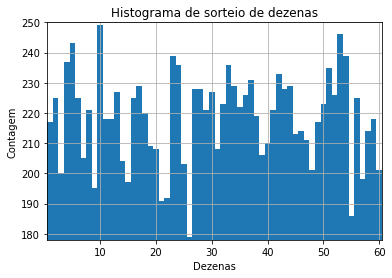

Frequencia das Dezenas
10    249
53    246
5     243
54    239
23    239
4     237
24    236
33    236
51    235
42    233
37    231
34    229
17    229
44    229
43    228
28    228
27    228
30    227
13    227
52    226
36    226
6     225
2     225
16    225
56    225
32    223
50    223
35    222
41    221
8     221
29    221
18    220
38    219
12    218
11    218
59    218
1     217
49    217
46    214
58    214
45    213
47    211
40    210
19    209
31    208
20    208
39    206
7     205
14    204
25    203
60    201
48    201
3     200
57    198
15    197
9     195
22    192
21    191
55    186
26    179
Name: numeros, dtype: int64


In [4]:
# Histograma
n, bins, patches = plt.hist(dezenas.to_numpy(), bins= np.arange(1 - 0.5, 60 + 0.5 + 1, 1))
plt.xlabel('Dezenas')
plt.ylabel('Contagem')
plt.title('Histograma de sorteio de dezenas')
plt.xlim(0.5, 60.5)
plt.ylim(min(n)-1, max(n)+1)
plt.grid(True)
plt.show()


# Mostra frequencia das dezenas
print('Frequencia das Dezenas')
print(dezenas['numeros'].value_counts().sort_values(ascending=False))


# RNN Simples

In [5]:
import tensorflow as tf

i_min, i_max = 0, len(sequence)-1

def time_series(i):
    return sequence[i,:]

# falta incorporar batch_size aqui
def next_batch(batch_size, n_steps):
    i0 = np.random.randint(len(sequence))
    Is = i0 + np.arange(0., n_steps + 1)
    ys = time_series(Is.astype(int))
    return ys[:-1, :], ys[-1:, :]


In [6]:
n_steps = 20

X_batch, y_batch = next_batch(1, n_steps)

print(X_batch)
print(y_batch)


[[60 28 54 37 45 11]
 [39 45 31 25 43 33]
 [19 10 16 15 28 35]
 [20 41 22 36 43 38]
 [46 34 59 45  9 42]
 [16 52 53 58 30 12]
 [47 43 38  1 17 45]
 [46  3  2 30 14 20]
 [11  5 30 31 13 19]
 [28 51 59 26 53 10]
 [10 52 23 36  3 43]
 [17 56 37 52 18  4]
 [34  8  2 15  9 22]
 [55 21 16 44 29 10]
 [15 19 35 59 14  2]
 [56 39 35  8 23 59]
 [24 17 10  1  3 23]
 [51 40 52 24 12  3]
 [10 29 24 43  6 55]
 [10 54 42 16 40 32]]
[[39 29 24 52  7 45]]


In [62]:
n_steps = 20
n_inputs = 1
n_neurons = 100
n_outputs = 1

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.float32, [None, n_steps, n_outputs])

cell = tf.nn.rnn_cell.BasicRNNCell(num_units=n_neurons, activation=tf.nn.relu)
outputs, states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)

ValueError: Variable rnn/basic_rnn_cell/kernel already exists, disallowed. Did you mean to set reuse=True or reuse=tf.AUTO_REUSE in VarScope? Originally defined at:

  File "<ipython-input-8-754474ae6f90>", line 10, in <module>
    outputs, states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)
  File "/home/jairo/anaconda3/envs/tensorflow/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3325, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/home/jairo/anaconda3/envs/tensorflow/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3248, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "/home/jairo/anaconda3/envs/tensorflow/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3057, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/jairo/anaconda3/envs/tensorflow/lib/python3.6/site-packages/IPython/core/async_helpers.py", line 68, in _pseudo_sync_runner
    coro.send(None)
